In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
# Load Data
weather_2015_2017 = pd.read_csv('cleaned_weather_2015_2017.csv', index_col=0)

In [3]:
weather_2015_2017.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,hour
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4


In [4]:
len(weather_2015_2017)

25146

In [5]:
beijing_spatial_15_17 = pd.read_csv('merged_spatial_weather_2015_2017.csv', index_col=0)

In [6]:
beijing_spatial_15_17.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,...,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St,avg_air_pollution
0,-204,-72,10349.000000,340.000000,10,NaN,7.510703,2015,1,1,...,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5,14.644118
1,-220,-50,10165.197636,20.000000,20,NaN,10.000000,2015,1,1,...,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0,16.429412
2,-220,-30,10165.197636,30.000000,30,NaN,10.000000,2015,1,1,...,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7,18.444118
3,-225,-12,10340.000000,180.000000,30,NaN,71.000000,2015,1,1,...,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8,15.455882
4,-220,0,10165.197636,180.584287,20,NaN,10.000000,2015,1,1,...,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0,15.773529


#### Add pollution to weather dataset

In [7]:
weather_2015_2017['pollution'] = beijing_spatial_15_17['avg_air_pollution']

In [8]:
weather_2015_2017.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,hour,pollution
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0,14.644118
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1,16.429412
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2,18.444118
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3,15.455882
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4,15.773529


In [9]:
UCI_2010_2014 = pd.read_csv('pollution.csv', index_col=0).reset_index(drop=True)

In [10]:
UCI_2010_2014.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


#### Format Weather 2015 to 2017 just like the UCI data set

In [11]:
merged_final_pollution = weather_2015_2017.copy()

In [12]:
merged_final_pollution.columns = ['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain',
                                 'year', 'month', 'day', 'hour', 'pollution']

In [13]:
merged_final_pollution.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,year,month,day,hour,pollution
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0,14.644118
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1,16.429412
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2,18.444118
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3,15.455882
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4,15.773529


### Exported this data in the UCI format

In [14]:
merged_final_pollution.to_csv('UCI_year_mo_day_pollution_weather_2015_2017.csv')

### Took out year, month, and day and exported

In [15]:
UCI_2010_2014.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [16]:
UCI_2015_2017 = merged_final_pollution.copy()

In [17]:
UCI_2015_2017 = UCI_2015_2017.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=False)

In [18]:
UCI_2015_2017 = UCI_2015_2017[['pollution','dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']]

In [19]:
def preprocess_parsed_col(df, column='wnd_dir'):
    '''
    Redo parsing for wind direction
    '''
    df[column] = df[column].apply(lambda x: wind_categories(x))
    return df

def wind_categories(x):
    x = int(x)
    if x >= 0 and x <= 90:
        # Angular degrees from True north
        y = 'NE'
    if x > 90 and x <= 180:
        y = 'SE'
    if x > 180 and x <=270:
        y = 'SW'
    if x > 270 and x <=360:
        y = 'NW'
    return y

In [20]:
UCI_2015_2017 = preprocess_parsed_col(UCI_2015_2017)

In [21]:
merged_final_pollution.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,year,month,day,hour,pollution
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0,14.644118
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1,16.429412
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2,18.444118
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3,15.455882
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4,15.773529


In [22]:
UCI_2015_2017.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,14.644118,-20.4,-7.2,1034.9,NW,1.0,0,0.0
1,16.429412,-22.0,-5.0,1016.6,NE,2.0,0,10.0
2,18.444118,-22.0,-3.0,1016.6,NE,3.0,0,10.0
3,15.455882,-22.5,-1.2,1034.0,SE,3.0,0,71.0
4,15.773529,-22.0,0.0,1016.6,SE,2.0,0,10.0


In [23]:
UCI_2010_2017 = pd.concat((UCI_2010_2014, UCI_2015_2017), axis=0)

In [24]:
UCI_2010_2017 = UCI_2010_2017.reset_index(drop=True)

In [25]:
#UCI_2010_2017.drop(['level_0','index'], axis=1, inplace=True)

In [26]:
len(UCI_2010_2017)

68946

In [27]:
UCI_2010_2017

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.000000,-16.0,-4.0,1020.0,SE,1.79,0,0.0
1,148.000000,-15.0,-4.0,1020.0,SE,2.68,0,0.0
2,159.000000,-11.0,-5.0,1021.0,SE,3.57,0,0.0
3,181.000000,-7.0,-5.0,1022.0,SE,5.36,1,0.0
4,138.000000,-7.0,-5.0,1022.0,SE,6.25,2,0.0
5,109.000000,-7.0,-6.0,1022.0,SE,7.14,3,0.0
6,105.000000,-7.0,-6.0,1023.0,SE,8.93,4,0.0
7,124.000000,-7.0,-5.0,1024.0,SE,10.72,0,0.0
8,120.000000,-8.0,-6.0,1024.0,SE,12.51,0,0.0
9,132.000000,-7.0,-5.0,1025.0,SE,14.30,0,0.0


In [28]:
UCI_2015_2017.to_csv('merged_final_UCI_format.csv')

### Checking merged UCI

In [29]:
len(UCI_2010_2017)

68946

In [30]:
# Let's just drop snow upfront:
data_no_snow = UCI_2010_2017.drop('snow', inplace=False, axis=1)

In [31]:
def cast_float_col(df, column='dew'):
    '''
    Redo parsing for dew
    '''
    df[column] = df[column].apply(lambda x: float(x))
    return df

def fix_snow_values(df, column='snow'):
    df[column] = df[column].apply(lambda x: 0 if x == ' ' else x)
    df[column] = df[column].apply(lambda x: 0 if x in ['O','R','E'] else x)
    df[column] = df[column].apply(lambda x: 0 if type(x) != str else int(x))
    return df

def what_type(df, col='snow'):
    return df[col].apply(lambda x: type(x))

In [32]:
snow_fixed_2010_2017 = fix_snow_values(UCI_2010_2017, column='snow')

In [33]:
cast_float_col(snow_fixed_2010_2017, column='snow').head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0
1,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0
2,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0
3,181.0,-7.0,-5.0,1022.0,SE,5.36,0.0,0.0
4,138.0,-7.0,-5.0,1022.0,SE,6.25,0.0,0.0


### Cleaned snow --> Export again to same file

In [34]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
import time

Using TensorFlow backend.


In [35]:
#UCI_2015_2017.to_csv('merged_final_UCI_format.csv')

In [36]:
data = data_no_snow

In [37]:
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

In [38]:
df.head()

NameError: name 'df' is not defined

   pollution   dew  temp   press wnd_dir  wnd_spd  rain
0      129.0 -16.0  -4.0  1020.0      SE     1.79   0.0
1      148.0 -15.0  -4.0  1020.0      SE     2.68   0.0
2      159.0 -11.0  -5.0  1021.0      SE     3.57   0.0
3      181.0  -7.0  -5.0  1022.0      SE     5.36   0.0
4      138.0  -7.0  -5.0  1022.0      SE     6.25   0.0


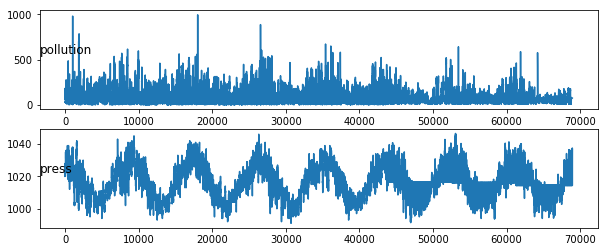

In [39]:
df = data
print(df.head())
# train = df.iloc[:365*24*3,]

cols_to_plot = ["pollution", "press"]
#['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'rain']
i = 1
# plot each column
plt.figure(figsize = (10,4))
for col in cols_to_plot:
    plt.subplot(len(cols_to_plot), 1, i)
    plt.plot(df[col])
    plt.title(col, y=0.5, loc='left')
    i += 1
plt.show()

In [81]:
## Fill NA with 0 
#print(df.isnull().sum())
df.fillna(0, inplace = True)

## One-hot encode 'wnd_dir'
# temp = pd.get_dummies(df['wnd_dir'], prefix='wnd_dir')
# df = pd.concat([df, temp], axis = 1)
# del df['wnd_dir'], temp

## Split into train and test
## or train and dev

# Dev Configs
# 2010-2013
train_size = 365 * 24 * 4
df_train = df.iloc[:(train_size), :].copy()
# 2015 - 2017
#df_test = df.iloc[train_size+365*24*1:, :].copy()
# 2014
df_test = df.iloc[train_size:-365*24*3, :].copy()


# # Test Configs
# train_size = 365 * 24 * 4
# df_train = df.iloc[:(train_size), :].copy()
# # Test
# # 2014
# df_test = df.iloc[train_size:, :].copy()



In [84]:
## take out the useful columns for modeling - you may also keep 'hour', 'day' or 'month' and to see if that will improve your accuracy
X_train = df_train.loc[:, ['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'rain', 'wnd_dir_NE', 
                           'wnd_dir_NW', 'wnd_dir_SE']].values.copy()
X_test = df_test.loc[:, ['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'rain', 'wnd_dir_NE', 
                           'wnd_dir_NW', 'wnd_dir_SE']].values.copy()
y_train = df_train['pollution'].values.copy().reshape(-1, 1)
y_test = df_test['pollution'].values.copy().reshape(-1, 1)




In [85]:
X_train

array([[ 129.,  -16.,   -4., ...,    0.,    0.,    1.],
       [ 148.,  -15.,   -4., ...,    0.,    0.,    1.],
       [ 159.,  -11.,   -5., ...,    0.,    0.,    1.],
       ..., 
       [  23.,  -21.,    7., ...,    0.,    1.,    0.],
       [  20.,  -21.,    6., ...,    0.,    1.,    0.],
       [  23.,  -20.,    7., ...,    0.,    1.,    0.]])

In [86]:
## z-score transform x - not including those one-hot columns!
for i in range(X_train.shape[1]-4):
    temp_mean = X_train[:, i].mean()
    temp_std = X_train[:, i].std()
    X_train[:, i] = (X_train[:, i] - temp_mean) / temp_std
    X_test[:, i] = (X_test[:, i] - temp_mean) / temp_std
    
## z-score transform y
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [87]:
X_train

array([[ 0.38778832, -1.22614435, -1.31259412, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.59451817, -1.15715365, -1.31259412, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71420387, -0.88119084, -1.39384963, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [-0.76554663, -1.57109787, -0.41878355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79818819, -1.57109787, -0.50003906, ...,  0.        ,
         1.        ,  0.        ],
       [-0.76554663, -1.50210717, -0.41878355, ...,  0.        ,
         1.        ,  0.        ]])

In [88]:
input_seq_len = 30
output_seq_len = 5

# previous batch size was 10
def generate_train_samples(x = X_train, y = y_train, batch_size = 24, input_seq_len = input_seq_len, output_seq_len = output_seq_len):

    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx = np.random.choice(range(total_start_points), batch_size, replace = False)
    
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in start_x_idx]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
    
    return input_seq, output_seq # in shape: (batch_size, time_steps, feature_dim)

def generate_test_samples(x = X_test, y = y_test, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    
    total_samples = x.shape[0]
    
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
    
    return input_seq, output_seq

In [89]:
x, y = generate_train_samples()
print(x.shape, y.shape)

(24, 30, 9) (24, 5, 1)


In [90]:
test_x, test_y = generate_test_samples()
print(test_x.shape, test_y.shape)

(7591, 30, 9) (7591, 5, 1)


In [91]:
# Imports

# DL libraries
import tensorflow as tf
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes

# Data Manipulation
import numpy as np 
import pandas as pd
import random
import math

# Files/OS
import os
import copy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Benchmarking
import time

In [92]:
## Parameters
learning_rate = 0.01
lambda_l2_reg = 0.003  

## Network Parameters
# length of input signals
input_seq_len = input_seq_len
# length of output signals
output_seq_len = output_seq_len
# size of LSTM Cell
hidden_dim = 24
# num of input signals
input_dim = X_train.shape[1]
# num of output signals
output_dim = y_train.shape[1]
# num of stacked lstm layers 
num_stacked_layers = 2 
# gradient clipping - to avoid gradient exploding
GRADIENT_CLIPPING = 2.5 

In [93]:
def build_graph(feed_previous = False):
    
    tf.reset_default_graph()
    
    global_step = tf.Variable(
                  initial_value=0,
                  name="global_step",
                  trainable=False,
                  collections=[tf.GraphKeys.GLOBAL_STEP, tf.GraphKeys.GLOBAL_VARIABLES])
    
    weights = {
        'out': tf.get_variable('Weights_out', \
                               shape = [hidden_dim, output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.truncated_normal_initializer()),
    }
    biases = {
        'out': tf.get_variable('Biases_out', \
                               shape = [output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.constant_initializer(0.)),
    }
                                          
    with tf.variable_scope('Seq2seq'):
        # Encoder: inputs
        enc_inp = [
            tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
               for t in range(input_seq_len)
        ]

        # Decoder: target outputs
        target_seq = [
            tf.placeholder(tf.float32, shape=(None, output_dim), name="y".format(t))
              for t in range(output_seq_len)
        ]

        # Give a "GO" token to the decoder. 
        # If dec_inp are fed into decoder as inputs, this is 'guided' training; otherwise only the 
        # first element will be fed as decoder input which is then 'un-guided'
        dec_inp = [ tf.zeros_like(target_seq[0], dtype=tf.float32, name="GO") ] + target_seq[:-1]

        with tf.variable_scope('LSTMCell'): 
            cells = []
            for i in range(num_stacked_layers):
                with tf.variable_scope('RNN_{}'.format(i)):
                    cells.append(tf.contrib.rnn.LSTMCell(hidden_dim))
            cell = tf.contrib.rnn.MultiRNNCell(cells)
         
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
          """RNN decoder for the sequence-to-sequence model.
          Args:
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            initial_state: 2D Tensor with shape [batch_size x cell.state_size].
            cell: rnn_cell.RNNCell defining the cell function and size.
            loop_function: If not None, this function will be applied to the i-th output
              in order to generate the i+1-st input, and decoder_inputs will be ignored,
              except for the first element ("GO" symbol). This can be used for decoding,
              but also for training to emulate http://arxiv.org/abs/1506.03099.
              Signature -- loop_function(prev, i) = next
                * prev is a 2D Tensor of shape [batch_size x output_size],
                * i is an integer, the step number (when advanced control is needed),
                * next is a 2D Tensor of shape [batch_size x input_size].
            scope: VariableScope for the created subgraph; defaults to "rnn_decoder".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing generated outputs.
              state: The state of each cell at the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
                (Note that in some cases, like basic RNN cell or GRU cell, outputs and
                 states can be the same. They are different for LSTM cells though.)
          """
          with variable_scope.variable_scope(scope or "rnn_decoder"):
            state = initial_state
            outputs = []
            prev = None
            for i, inp in enumerate(decoder_inputs):
              if loop_function is not None and prev is not None:
                with variable_scope.variable_scope("loop_function", reuse=True):
                  inp = loop_function(prev, i)
              if i > 0:
                variable_scope.get_variable_scope().reuse_variables()
              output, state = cell(inp, state)
              outputs.append(output)
              if loop_function is not None:
                prev = output
          return outputs, state

        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=dtypes.float32,
                              scope=None):
          """Basic RNN sequence-to-sequence model.
          This model first runs an RNN to encode encoder_inputs into a state vector,
          then runs decoder, initialized with the last encoder state, on decoder_inputs.
          Encoder and decoder use the same RNN cell type, but don't share parameters.
          Args:
            encoder_inputs: A list of 2D Tensors [batch_size x input_size].
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            feed_previous: Boolean; if True, only the first of decoder_inputs will be
              used (the "GO" symbol), all other inputs will be generated by the previous 
              decoder output using _loop_function below. If False, decoder_inputs are used 
              as given (the standard decoder case).
            dtype: The dtype of the initial state of the RNN cell (default: tf.float32).
            scope: VariableScope for the created subgraph; default: "basic_rnn_seq2seq".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing the generated outputs.
              state: The state of each decoder cell in the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
          """
          with variable_scope.variable_scope(scope or "basic_rnn_seq2seq"):
            enc_cell = copy.deepcopy(cell)
            _, enc_state = rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
            if feed_previous:
                return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
            else:
                return _rnn_decoder(decoder_inputs, enc_state, cell)

        def _loop_function(prev, _):
          '''Naive implementation of loop function for _rnn_decoder. Transform prev from 
          dimension [batch_size x hidden_dim] to [batch_size x output_dim], which will be
          used as decoder input of next time step '''
          return tf.matmul(prev, weights['out']) + biases['out']
        
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp, 
            dec_inp, 
            cell, 
            feed_previous = feed_previous
        )

        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]
        
    # Training loss and optimizer
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            output_loss += tf.reduce_mean(tf.pow(_y - _Y, 2))

        # L2 regularization for weights and biases
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))

        loss = output_loss + lambda_l2_reg * reg_loss

    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
        
    saver = tf.train.Saver
    
    return dict(
        enc_inp = enc_inp, 
        target_seq = target_seq, 
        train_op = optimizer, 
        loss=loss,
        saver = saver, 
        reshaped_outputs = reshaped_outputs,
        )

In [94]:
epochs = 100
#batch_size = 16
batch_size = 16
KEEP_RATE = 0.5
train_losses = []
val_losses = []

x = np.linspace(0, 40, 130)
train_data_x = x[:110]

rnn_model = build_graph(feed_previous=False)

saver = tf.train.Saver()

start_train = time.time()
init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    print("Training losses: ")
    for i in range(epochs):
        batch_input, batch_output = generate_train_samples(batch_size=batch_size)
        
        feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t] for t in range(input_seq_len)}
        feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t] for t in range(output_seq_len)})
        _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        print(loss_t)
        
    temp_saver = rnn_model['saver']()
    save_path = temp_saver.save(sess, os.path.join('./', 'multivariate_ts_pollution_case'))
        
print("Checkpoint saved at: ", save_path)

Training losses: 
4.16046
4.34694
2.64086
2.18661
4.28749
5.08522
2.54014
0.716299
0.946548
1.43638
1.01663
1.88258
0.794812
1.22958
1.28862
0.665559
0.656429
7.37477
0.775489
1.52272
1.21744
0.568795
0.430477
2.87859
2.33397
1.27614
1.8849
0.738201
0.470477
1.24826
0.824611
0.7986
0.732961
0.267103
0.620805
0.600233
1.24629
2.47163
0.901089
0.892088
0.613618
0.803589
0.628635
0.555342
0.630325
0.761451
0.837247
0.445726
0.391778
0.486537
0.501523
0.658016
0.343576
0.764289
1.1255
0.917842
0.933149
1.82972
0.561275
0.383772
1.3505
0.319342
0.516139
0.463363
0.352933
1.26066
0.673132
0.515009
0.709903
0.720632
2.01886
1.34158
0.715021
0.643308
1.51535
0.321739
0.610883
0.478296
0.666776
0.919353
0.949233
0.256017
0.337415
3.49518
0.524462
0.655335
0.8483
0.643138
0.543169
0.279455
0.321298
0.303259
0.517125
0.374335
2.00446
0.532258
0.574653
0.338264
0.218472
0.427451
Checkpoint saved at:  ./multivariate_ts_pollution_case


In [95]:
end_train = time.time()

In [96]:
print('Time taken to train is {} minutes'.format((end_train - start_train) / 60))
print('Time in seconds is: {}'.format(end_train - start_train))
train_time = end_train - start_train

Time taken to train is 0.1868265191713969 minutes
Time in seconds is: 11.209591150283813


## Test

In [97]:
start_test = time.time()

In [98]:
rnn_model = build_graph(feed_previous=True)

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    saver = rnn_model['saver']().restore(sess,  os.path.join('./', 'multivariate_ts_pollution_case'))
    
    feed_dict = {rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)} # batch prediction
    feed_dict.update({rnn_model['target_seq'][t]: np.zeros([test_x.shape[0], output_dim], dtype=np.float32) for t in range(output_seq_len)})
    final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
    
    final_preds = [np.expand_dims(pred, 1) for pred in final_preds]
    final_preds = np.concatenate(final_preds, axis = 1)
    print("Test mse is: ", np.mean((final_preds - test_y)**2))

INFO:tensorflow:Restoring parameters from ./multivariate_ts_pollution_case
Test mse is:  0.295361456272


In [99]:
end_test = time.time()

In [100]:
print('Time taken is: {} minutes.'.format((end_test - start_test) / 60))
print('Time in seconds is: {}'.format(end_test - start_test))

Time taken is: 0.18375056584676105 minutes.
Time in seconds is: 11.025033950805664


In [101]:
test_time = end_test - start_test

In [102]:
## remove duplicate hours and concatenate into one long array
test_y_expand = np.concatenate([test_y[i].reshape(-1) for i in range(0, test_y.shape[0], 5)], axis = 0)
final_preds_expand = np.concatenate([final_preds[i].reshape(-1) for i in range(0, final_preds.shape[0], 5)], axis = 0)

In [103]:
def plot_test(final_preds_expand, test_y_expand):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title("Test Predictions vs. Actual For Last Year")
    ax.plot(final_preds_expand, color = 'red', label = 'predicted')
    ax.plot(test_y_expand, color = 'green', label = 'actual')
    plt.legend(loc="upper left")
    plt.show()

In [104]:
final_preds_expand.shape

(7595,)

In [105]:
# Unscale the preds
# make into one array
dim1, dim2 = final_preds.shape[0], final_preds.shape[1]
preds_flattened = final_preds.reshape(dim1*dim2, 1)

In [106]:
unscaled_yhat = pd.DataFrame(preds_flattened, columns=['pm2.5']).apply(lambda x: (x*y_std) + y_mean)

In [107]:
yhat_inv = unscaled_yhat.values

In [108]:
test_y.shape

(7591, 5, 1)

In [109]:
test_y_flattened = test_y.reshape(dim1*dim2, 1)

In [110]:
unscaled_y = pd.DataFrame(test_y_flattened, columns=['pm2.5']).apply(lambda x: (x*y_std) + y_mean)

In [111]:
y_inv = unscaled_y.values

In [112]:
pd.concat((unscaled_y,unscaled_yhat),axis=1)

,pm2.5,pm2.5
0,166.0,151.685745
1,187.0,156.567596
2,107.0,160.782928
3,114.0,167.530396
4,108.0,178.943481
5,187.0,163.868958
6,107.0,172.856812
7,114.0,179.529739
8,108.0,188.676163
9,102.0,203.196930


In [113]:
mse = np.mean((yhat_inv - y_inv)**2)

In [114]:
mse

2494.9086340069048

In [115]:
rmse = np.sqrt(mse)

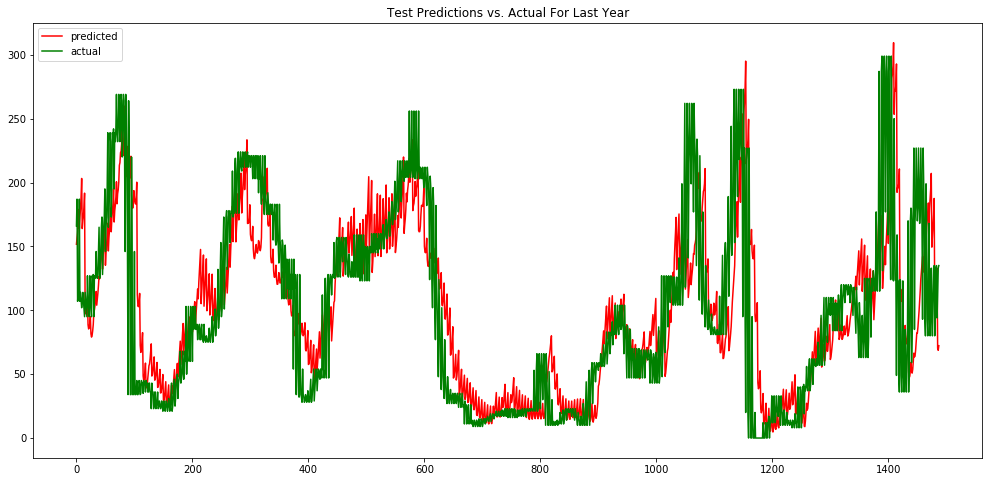

In [116]:
plot_test(unscaled_yhat.iloc[:24*31*2,], unscaled_y.iloc[:24*31*2,])

In [117]:
print('Time to test: {:.3f}'.format(test_time))
print('Time to train: {:.3f}'.format(train_time))

Time to test: 11.025
Time to train: 11.210


In [118]:
print('Root Mean Squared Error: {:.4f}'.format(rmse))

#Calculate R^2 (regression score function)
print('Variance score: {:2f}'.format(r2_score(y_inv, yhat_inv)))

Root Mean Squared Error: 49.9491
Variance score: 0.698211
